<a href="https://colab.research.google.com/github/catastropiyush/course_notes/blob/main/Numerical_Methods_Assignment_Piyush_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Piyush Maharana
#Numerical Methods Assignment

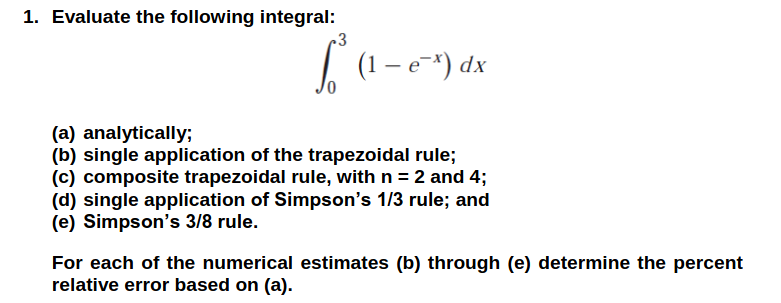

In [ ]:
!pip install smplotlib
import smplotlib

In [3]:
import numpy as np
import matplotlib.pyplot as plt

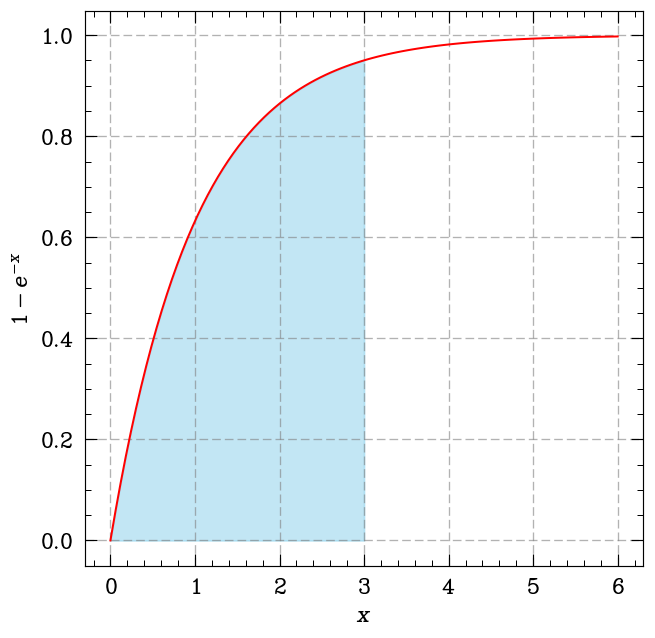

In [ ]:
def func(x):
  return 1 - np.exp(-x)
x = np.linspace(0, 6, 100)
y = func(x)

plt.plot(x, y,color='red')
plt.xlabel(r"$x$")
plt.ylabel(r'$1 - e^{-x}$')
plt.grid(True)

x_fill = np.linspace(0, 3, 100)
y_fill = func(x_fill)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)

plt.show()

In [ ]:
import numpy as np

def analytical_solution():
    return np.exp(-3)+2

def trapezoidal_rule(a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = 1 - np.exp(-x)
    integral = h * (y[0] + y[-1]) / 2
    for i in range(1, n):
        integral += h * y[i]

    return integral

print(f"Analytical solution: {analytical_solution()}")
print(f"Trapezoidal rule (n=1): {trapezoidal_rule(0,3,1)}")

Analytical solution: 2.049787068367864
Trapezoidal rule (n=1): 1.4253193974482041


In [ ]:
print(f"Trapezoidal rule (n=1): {trapezoidal_rule(0,3,1)}")
print(f"Trapezoidal rule (n=2): {trapezoidal_rule(0,3,2)}")
print(f"Trapezoidal rule (n=4): {trapezoidal_rule(0,3,4)}")

Trapezoidal rule (n=1): 1.4253193974482041
Trapezoidal rule (n=2): 1.8779644585014574
Trapezoidal rule (n=4): 2.0056578962735694


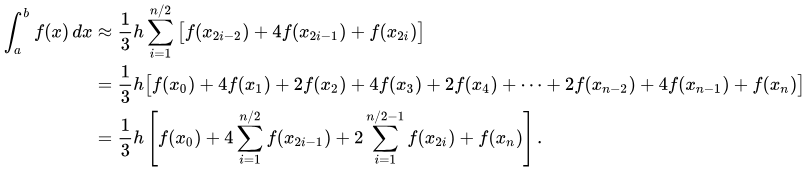

In [ ]:
def simpson_13_rule(a,b,n):
    x        = np.linspace(0, 3, n+1)
    y        = 1 - np.exp(-x)     #f(x) to be integrated
    integral = np.sum(y[:-1:2]) * 2 + np.sum(y[1:-1:2]) * 4 + y[0] + y[-1]
    integral *= (b-a)/(3*n)
    return integral

In [ ]:
print(f"Simpson's 1/3 rule (n=1): {simpson_13_rule(0,3,1)}")

Simpson's 1/3 rule (n=1): 0.950212931632136


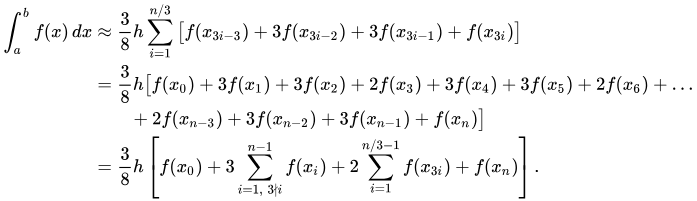

In [ ]:
def simpson_38_rule(a, b, n):
    h = (b - a)/(n - 1)
    x = np.linspace(a, b, n)
    y = 1 - np.exp(-x)       #f(x) to be integrated

    integral = y[0] + y[-1]
    for i in range(1, n-1, 3):
        integral += 3 * y[i]    #3*f(x1) + 3*f(x4) + 3*f(x7) + .
    for i in range(2, n-1, 3):
        integral += 3 * y[i]    #3*f(x2) + 3*f(x5) + 3*f(x8) + ...
    for i in range(3, n-1, 3):
        integral += 2 * y[i]    #2*f(x3) + 2*f(x6) + 2*f(x9) + ...
    integral *= 3 * h / 8

    return integral

In [ ]:
print(f"Simpson's 3/8 rule (n=10): {simpson_38_rule(0,3,10)}")

Simpson's 3/8 rule (n=10): 2.0496442142344247


In [ ]:
def percent_relative_error(numerical_result, analytical_result):
    return abs((numerical_result - analytical_result) / analytical_result) * 100

print(f"Percent relative error for n=1 trapezoidal rule  : {percent_relative_error(trapezoidal_rule(0,3,1), analytical_solution()):.2f}%")

print(f"Percent relative error for n=1 Simpson's 1/3 rule: {percent_relative_error(simpson_13_rule(0,3,1), analytical_solution()):.2f}%")

print(f"Percent relative error for Simpson's 3/8 rule    : {percent_relative_error(simpson_38_rule(0,3,10), analytical_solution()):.2f}%")

Percent relative error for n=1 trapezoidal rule  : 30.47%
Percent relative error for n=1 Simpson's 1/3 rule: 53.64%
Percent relative error for Simpson's 3/8 rule    : 0.01%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, trapz, simps

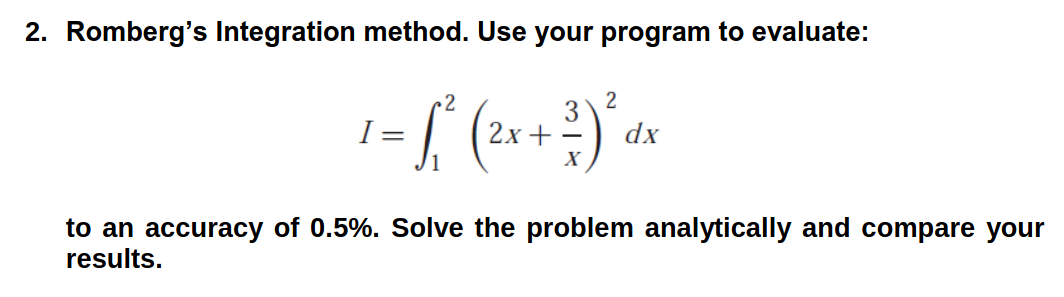

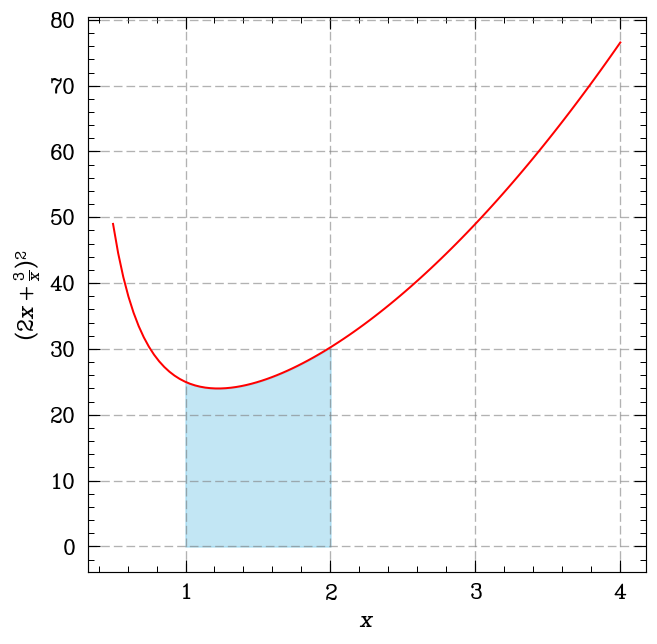

In [ ]:
def func(x):
  return ((2*x + 3/x))**2

x = np.linspace(0.5, 4, 100)
y = func(x)

plt.plot(x, y, color='red')
plt.xlabel(r"$x$")
plt.ylabel(r'$(2x+\frac{3}{x})^{2}$')
plt.grid(True)

x_fill = np.linspace(1, 2, 100)
y_fill = func(x_fill)
plt.fill_between(x_fill, y_fill, color='skyblue', alpha=0.5)

plt.show()

In [2]:
from scipy import integrate
from scipy.special import erf
import numpy as np

funky = lambda x: (2*x + (3/x))**2
result = integrate.romberg(funky, 1, 2, show=True)

Romberg integration of <function vectorize1.<locals>.vfunc at 0x7c46add52cb0> from [1, 2]

 Steps  StepSize   Results
     1  1.000000 27.625000 
     2  0.500000 26.312500 25.875000 
     4  0.250000 25.955944 25.837092 25.834565 
     8  0.125000 25.864188 25.833602 25.833370 25.833351 
    16  0.062500 25.841060 25.833351 25.833334 25.833333 25.833333 
    32  0.031250 25.835266 25.833334 25.833333 25.833333 25.833333 25.833333 

The final result is 25.833333333536203 after 33 function evaluations.


<ipython-input-2-2317e512caff>:6: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  result = integrate.romberg(funky, 1, 2, show=True)


Exact integral value (2): 25.83
Computed integral value: 25.833333333333105
Absolute error: 23.833333333333105


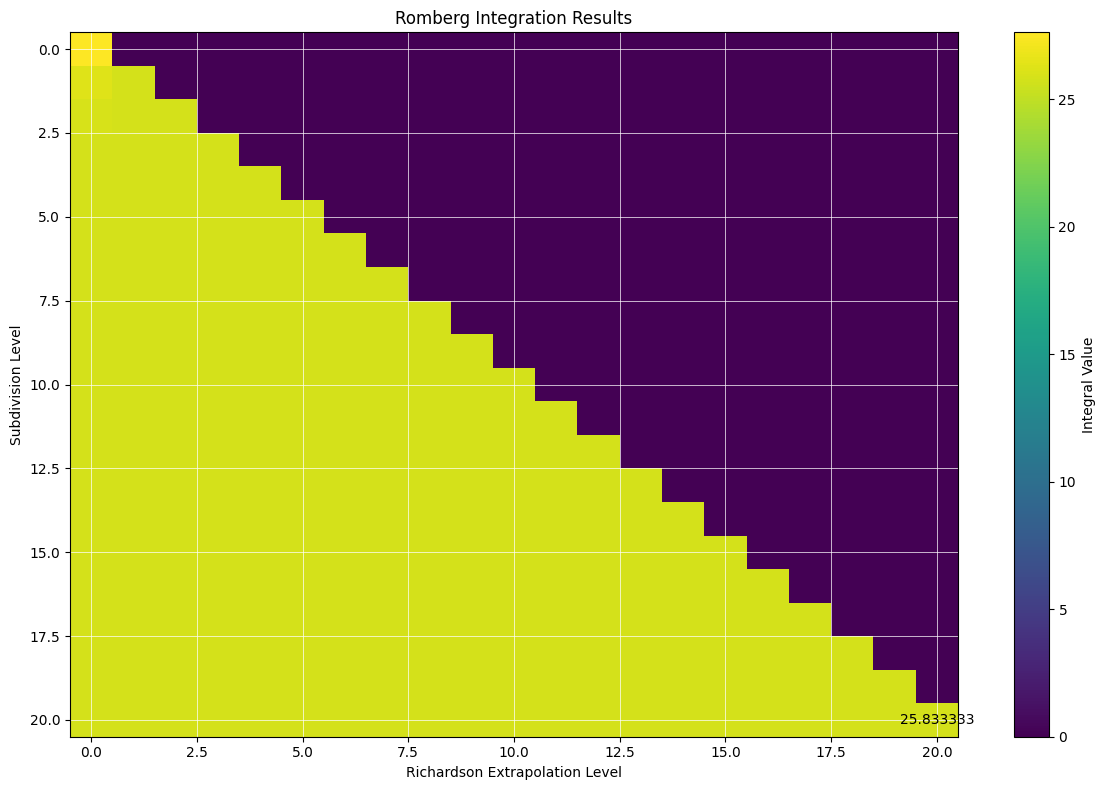

In [8]:
def romberg(f, a, b, n):
    r = np.array([[0] * (n+1)] * (n+1), float)
    h = b - a
    r[0,0] = 0.5 * h * (f(a) + f(b))

    powerOf2 = 1
    for i in range(1, n + 1):
        # Compute the halved stepsize and use this to sum the function at
        # all the new points (in between the points already computed)
        h = 0.5 * h

        sum = 0.0
        powerOf2 = 2 * powerOf2
        for k in range(1, powerOf2, 2):
            sum = sum + f(a + k * h)

        # Compute the composite trapezoid rule for the next level of
        # subdivision. Use Richardson extrapolation to refine these values
        # into a more accurate form.
        r[i,0] = 0.5 * r[i-1,0] + sum * h

        powerOf4 = 1
        for j in range(1, i + 1):
            powerOf4 = 4 * powerOf4
            r[i,j] = r[i,j-1] + (r[i,j-1] - r[i-1,j-1]) / (powerOf4 - 1)

    return r

def f(x):
    return (2*x + (3/x))**2

# number of recursion levels
n = 20
result = romberg(f, 1,2, n)

# Plot the Romberg integration results
plt.figure(figsize=(12, 8))
plt.imshow(result, cmap='viridis', aspect='auto')
plt.colorbar(label='Integral Value')
plt.title('Romberg Integration Results')
plt.xlabel('Richardson Extrapolation Level')
plt.ylabel('Subdivision Level')

plt.text(n, n, f'{result[n,n]:.6f}',
         horizontalalignment='center',
         verticalalignment='center',
         color='black')

plt.grid(color='white', linestyle='-', linewidth=0.5)

print(f"Exact integral value (2): {25.83}")
print(f"Computed integral value: {result[n,n]}")
print(f"Absolute error: {abs(2 - result[n,n])}")

plt.tight_layout()
plt.show()

<ipython-input-10-a8b6f8b5f7aa>:13: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  area = simps(y, x)


The approximate integral using Simpson's method is: 25.83334


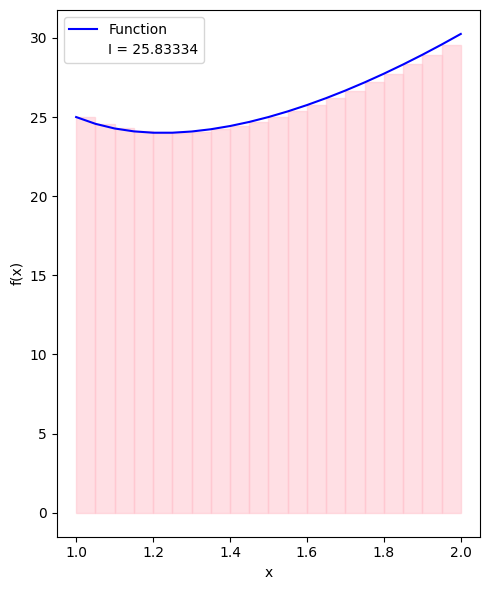

In [10]:
from scipy.integrate import simps

def integrand(x):
    return (2*x + (3/x))**2

a = 1
b = 2
n = 20

x = np.linspace(a, b, n+1)
y = integrand(x)

area = simps(y, x)
print(f"The approximate integral using Simpson's method is: {area:.5f}")

fig, ax = plt.subplots(figsize=(5, 6))
ax.plot(x, y, color='blue', label='Function')

for i in range(n):
    rect_x = [x[i], x[i], x[i+1], x[i+1]]
    rect_y = [0, y[i], y[i], 0]
    ax.fill(rect_x, rect_y, color='pink', alpha=0.5)

ax.set_xlabel('x')
ax.set_ylabel('f(x)')

ax.plot([], [], ' ', label=f"I = {area:.5f}")

ax.legend()
ax.legend()
plt.tight_layout()
plt.show()

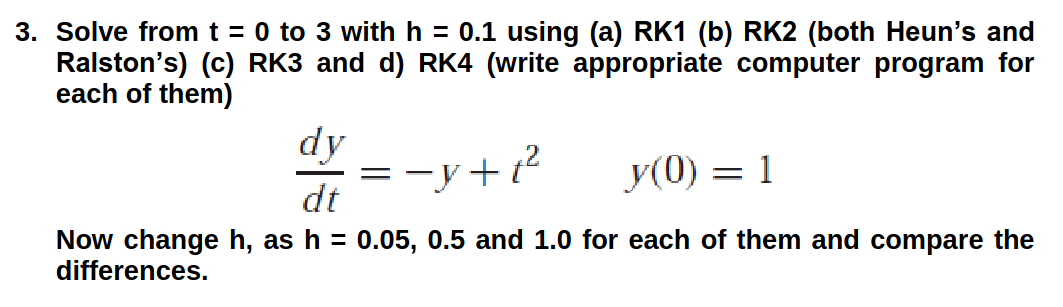

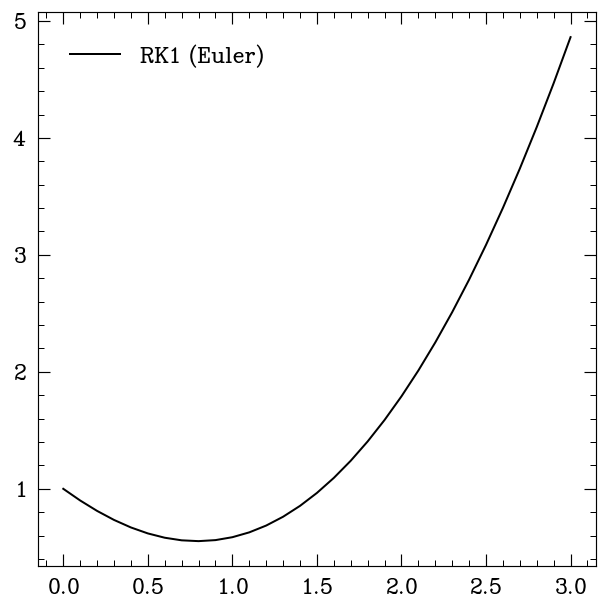

In [ ]:
def df(t, y):
    return -y + t**2

t = np.linspace(0, 3, 31)
y = np.zeros_like(t)
y[0] = 1   #Intitial value

h = 0.1
for i in range(len(t)-1):
    y[i+1] = y[i] + h * df(t[i], y[i])

plt.plot(t, y, label='RK1 (Euler)')
plt.legend()

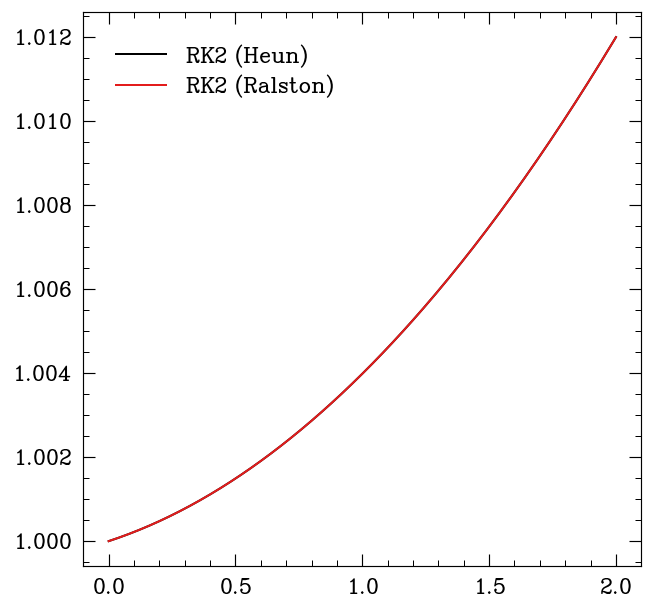

In [ ]:
def rk2_heun(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h, y + k1)
    return y + (k1 + k2) / 2

def rk2_ralston(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + 2*h/3, y + 2*k1/3)
    return y + (k1 + 3*k2) / 4

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk2_heun(t[i], y[i], h)

plt.plot(t, y, label='RK2 (Heun)')

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk2_ralston(t[i], y[i], h)

plt.plot(t, y, label='RK2 (Ralston)')
plt.legend()

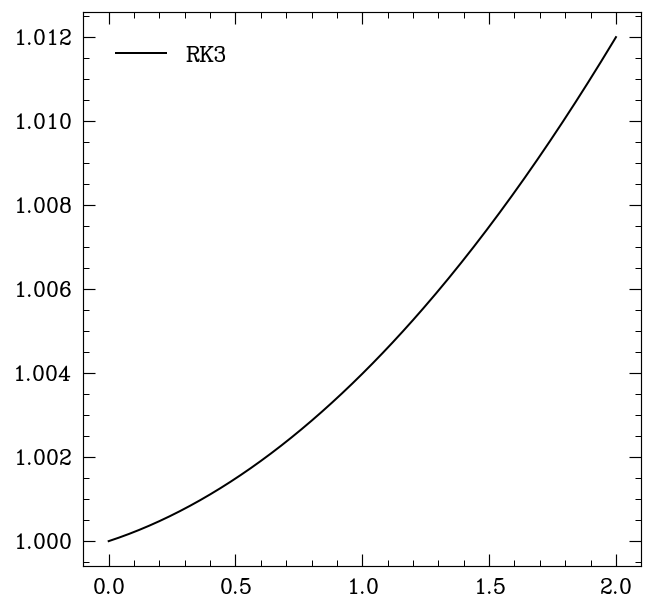

In [ ]:
def rk3(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h/2, y + k1/2)
    k3 = h * de(t + h, y - k1 + 2*k2)
    return y + (k1 + 4*k2 + k3) / 6

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk3(t[i], y[i], h)

plt.plot(t, y, label='RK3')
plt.legend()

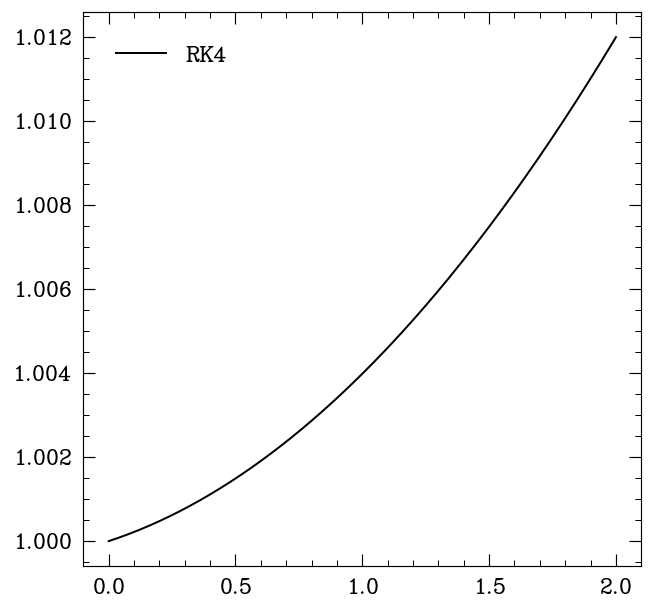

In [ ]:
def rk4(t, y, h):
    k1 = h * de(t, y)
    k2 = h * de(t + h/2, y + k1/2)
    k3 = h * de(t + h/2, y + k2/2)
    k4 = h * de(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

y = np.zeros_like(t)
y[0] = 1

for i in range(len(t)-1):
    y[i+1] = rk4(t[i], y[i], h)

plt.plot(t, y, label='RK4')
plt.legend()

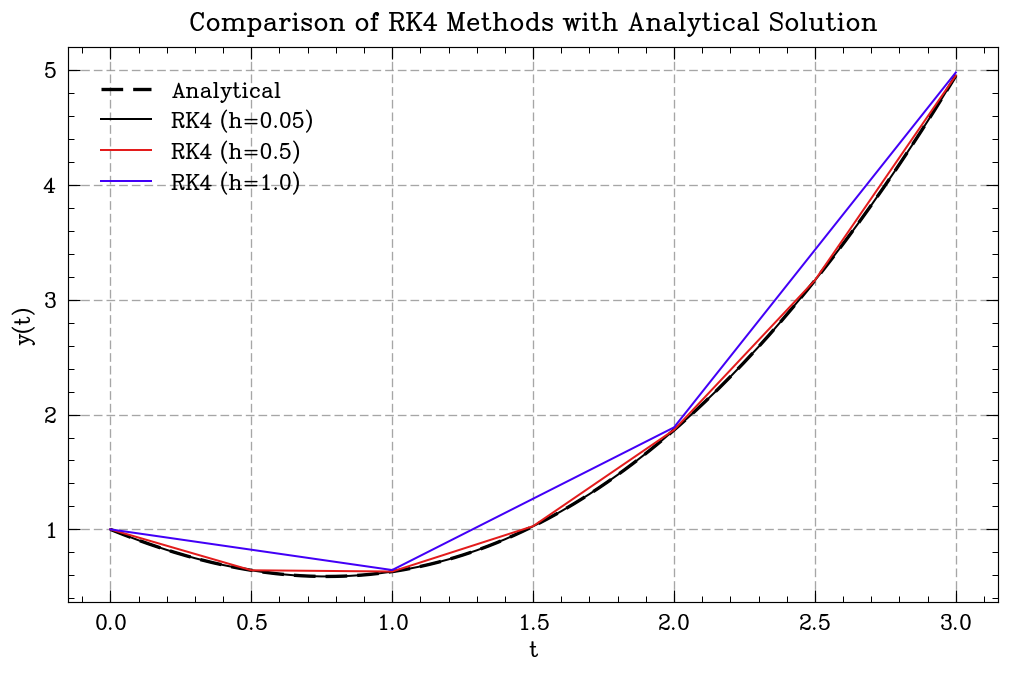

In [ ]:
def rk4(t, y, h, f):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5*h, y + 0.5*k1)
    k3 = h * f(t + 0.5*h, y + 0.5*k2)
    k4 = h * f(t + h, y + k3)

    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def f(t, y):
     return -y + t**2

# Analytical solution
def ana_f(t):
    return -(1/np.exp(t)) + t**2 - 2*t + 2


h_values = [0.05, 0.5, 1.0]
t1 = np.linspace(0, 3, 200)

plt.figure(figsize=(10, 6))
plt.plot(t1, ana_f(t1), label='Analytical', linestyle='--', color='black', linewidth=2)

for h in h_values:
    t = np.arange(0, 3+h, h)
    y = np.zeros_like(t)
    y[0] = 1  # Initial condition

    for i in range(len(t)-1):
        y[i+1] = rk4(t[i], y[i], h, f)
    plt.plot(t, y, label=f'RK4 (h={h})')

plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of RK4 Methods with Analytical Solution')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

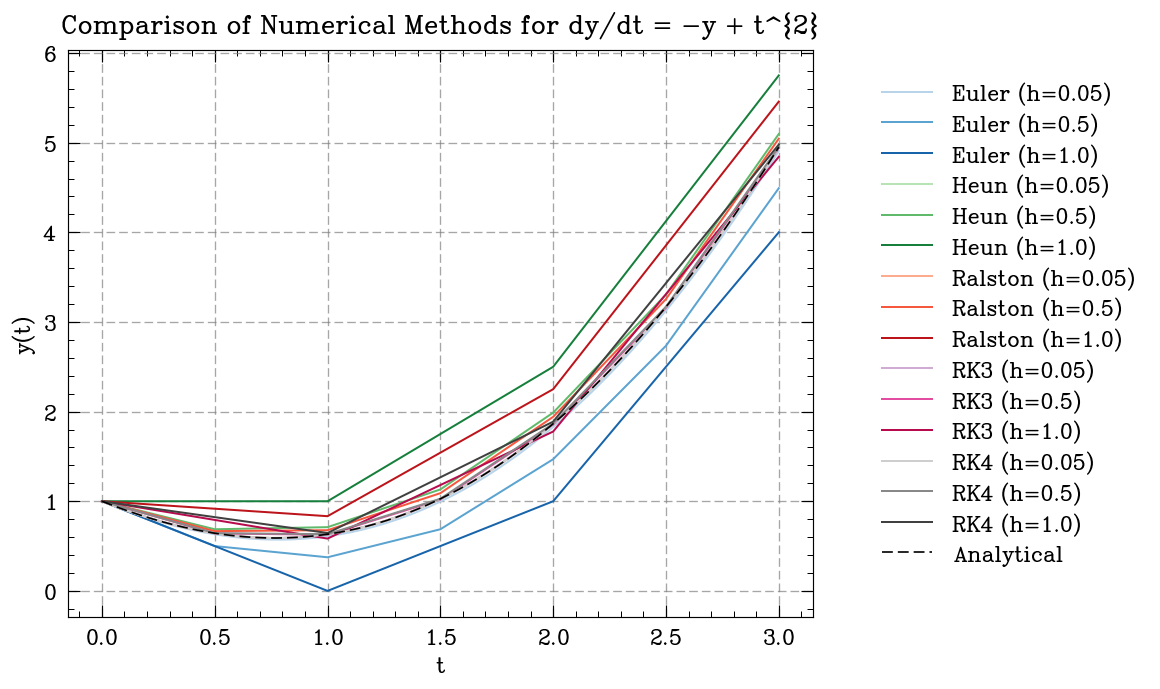

In [ ]:
import matplotlib.colors as mcolors

def df(t, y):          #Differential equation
    return -y + t**2

def euler_method(t, y, h): #Euler method (RK1)
    return y + h * df(t, y)

def rk2_heun(t, y, h): #Heun method
    k1 = h * df(t, y)
    k2 = h * df(t + h, y + k1)
    return y + (k1 + k2) / 2

def rk2_ralston(t, y, h):
    """Runge-Kutta 2nd order Ralston method"""
    k1 = h * df(t, y)
    k2 = h * df(t + 2*h/3, y + 2*k1/3)
    return y + (k1 + 3*k2) / 4

def rk3_method(t, y, h):
    """Runge-Kutta 3rd order method"""
    k1 = h * df(t, y)
    k2 = h * df(t + h/2, y + k1/2)
    k3 = h * df(t + h, y - k1 + 2*k2)
    return y + (k1 + 4*k2 + k3) / 6

def rk4_method(t, y, h):
    """Runge-Kutta 4th order method"""
    k1 = h * df(t, y)
    k2 = h * df(t + h/2, y + k1/2)
    k3 = h * df(t + h/2, y + k2/2)
    k4 = h * df(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def solve_ode(method, step_sizes):
    """Solve ODE for different step sizes using a specific method"""
    results = []
    for h in step_sizes:

        t = np.arange(0, 3+h, h)
        y = np.zeros_like(t)
        y[0] = 1  # Initial condition

        for i in range(len(t)-1):
            y[i+1] = method(t[i], y[i], h)
        results.append((t, y))
    return results

# Analytical solution
def ana_f(t):
    return -(1/np.exp(t)) + t**2 - 2*t + 2


methods = [
    (euler_method, 'Euler'),
    (rk2_heun, 'Heun'),
    (rk2_ralston, 'Ralston'),
    (rk3_method, 'RK3'),
    (rk4_method, 'RK4')
]

# Step sizes
step_sizes = [0.05,0.5,1.0]

plt.figure(figsize=(10,6))
color_palettes = [
    plt.cm.Blues,   # Euler
    plt.cm.Greens,  # Heun
    plt.cm.Reds,    # Ralston
    plt.cm.PuRd, # RK3
    plt.cm.Greys  # RK4
]

for (method, method_name), color_palette in zip(methods, color_palettes):
    results = solve_ode(method, step_sizes)
    for i, (t, y) in enumerate(results):
        color = color_palette(0.3 + 0.5 * (i / (len(step_sizes) - 1)))
        plt.plot(t, y, label=f'{method_name} (h={step_sizes[i]})', color=color)


plt.plot(t1, ana_f(t1), label='Analytical', linestyle='--', color='black', linewidth=1)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparison of Numerical Methods for dy/dt = -y + t^{2}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

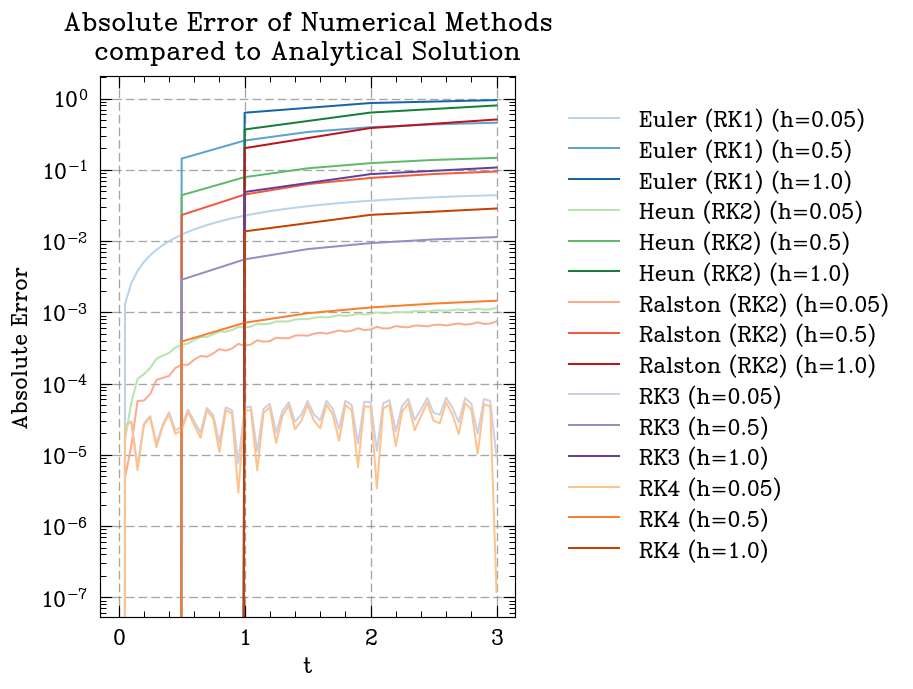

Maximum Errors:
Euler (RK1) (h=0.05): 0.043979
Euler (RK1) (h=0.5): 0.458025
Euler (RK1) (h=1.0): 0.950213
Heun (RK2) (h=0.05): 0.001153
Heun (RK2) (h=0.5): 0.146915
Heun (RK2) (h=1.0): 0.799787
Ralston (RK2) (h=0.05): 0.000747
Ralston (RK2) (h=0.5): 0.094671
Ralston (RK2) (h=1.0): 0.508120
RK3 (h=0.05): 0.000063
RK3 (h=0.5): 0.011365
RK3 (h=1.0): 0.107620
RK4 (h=0.05): 0.000054
RK4 (h=0.5): 0.001455
RK4 (h=1.0): 0.028628


In [ ]:
methods = [
    (euler_method, 'Euler (RK1)'),
    (rk2_heun, 'Heun (RK2)'),
    (rk2_ralston, 'Ralston (RK2)'),
    (rk3_method, 'RK3'),
    (rk4_method, 'RK4')
]

def solve_ode_with_error(method, step_sizes):
    """Solve ODE for different step sizes and compute error"""
    results = []
    for h in step_sizes:
        t = np.arange(0, 3+h, h)
        y = np.zeros_like(t)
        y[0] = 1  # Initial condition

        for i in range(len(t)-1):
            y[i+1] = method(t[i], y[i], h)

        # Interpolate analytical solution to match numerical solution points
        ana_y = np.interp(t, np.linspace(0, 3, 200), ana_f(np.linspace(0, 3, 200)))
        # Calculate absolute error
        error = np.abs(y - ana_y)

        results.append((t, error))
    return results

plt.figure(figsize=(8,6))

for (method, method_name), color_palette in zip(methods, color_palettes):
    results = solve_ode_with_error(method, step_sizes)

    for i, (t, error) in enumerate(results):
        color = color_palette(0.3 + 0.5 * (i / (len(step_sizes) - 1)))
        plt.plot(t, error, label=f'{method_name} (h={step_sizes[i]})', color=color)

plt.xlabel('t')
plt.ylabel('Absolute Error')
plt.title('Absolute Error of Numerical Methods\ncompared to Analytical Solution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.yscale('log')  # Use log scale to better visualize error differences
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("Maximum Errors:")
for (method, method_name), color_palette in zip(methods, color_palettes):
    results = solve_ode_with_error(method, step_sizes)
    for i, (t, error) in enumerate(results):
        print(f"{method_name} (h={step_sizes[i]}): {np.max(error):.6f}")

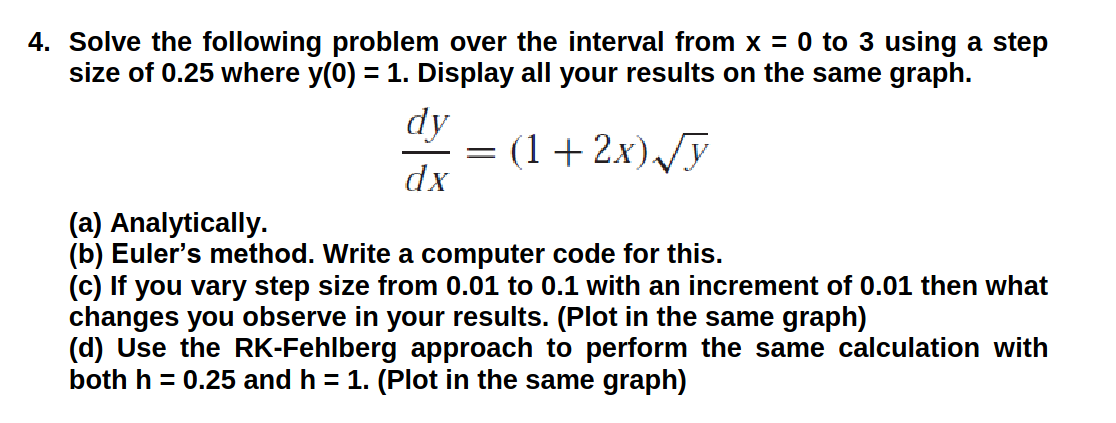

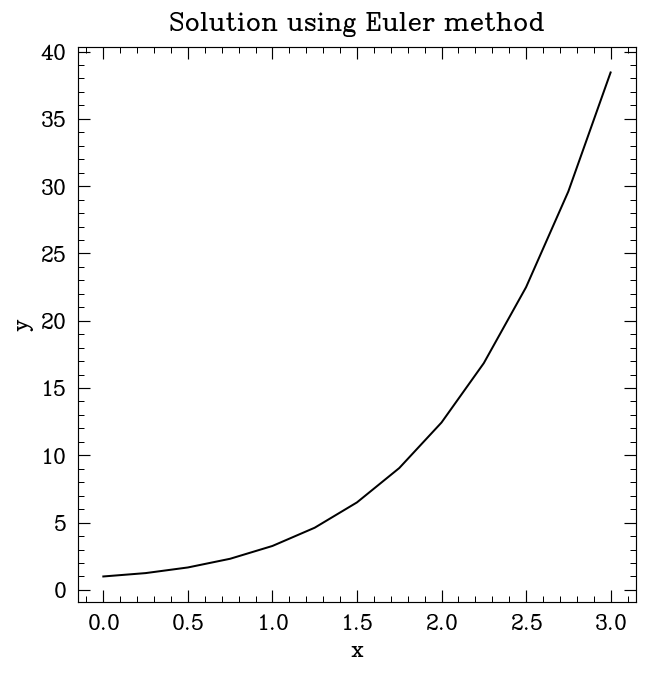

In [ ]:
def de(x, y):
    return (1 + 2*x) * np.sqrt(y)


x = np.linspace(0, 3, 13)
y = np.zeros_like(x)
y[0] = 1


h = 0.25
for i in range(len(x)-1):
    y[i+1] = y[i] + h * de(x[i], y[i])

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution using Euler method')
plt.show()

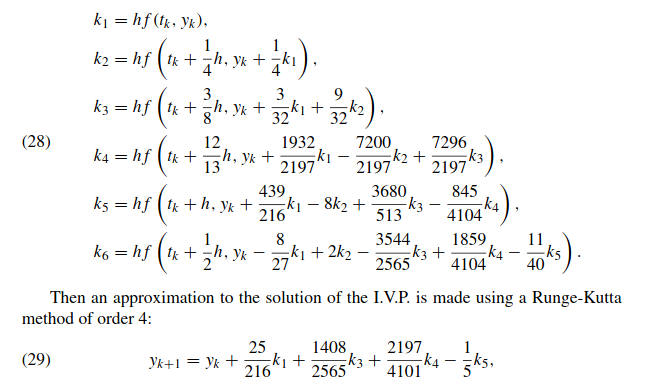

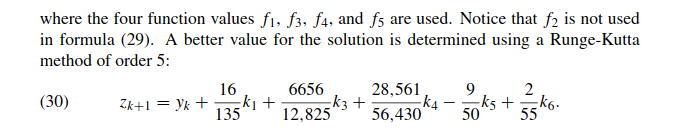

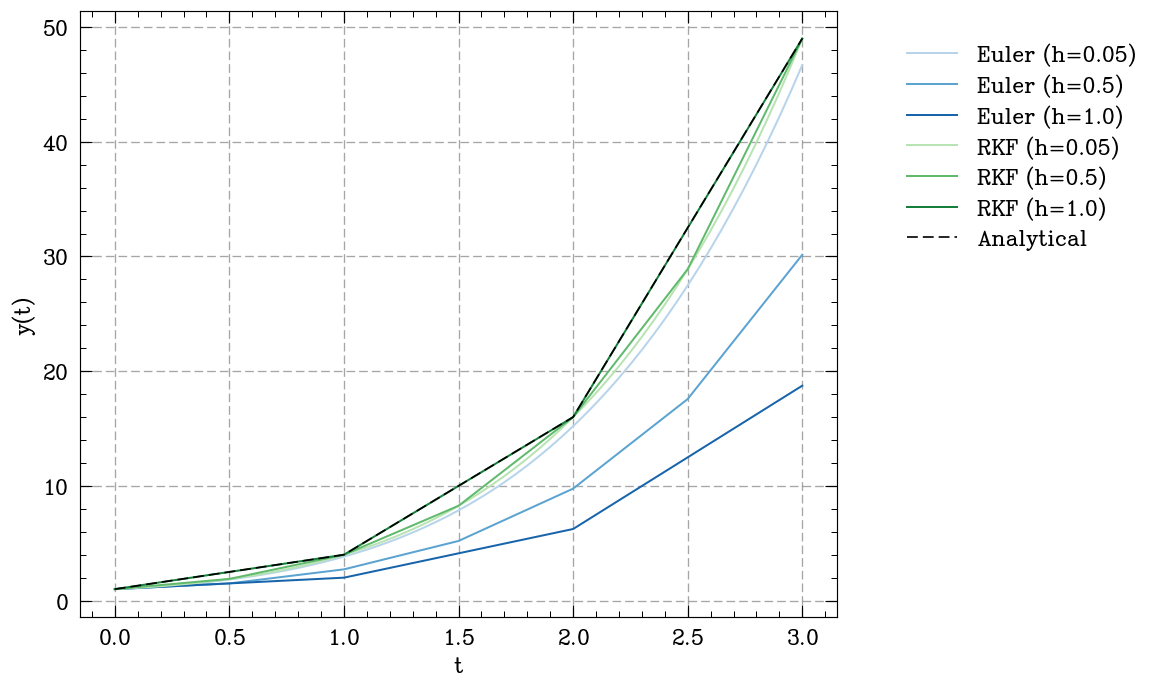

In [ ]:
import matplotlib.colors as mcolors

def df(x, y):          #Differential equation
    return (1 + 2*x) * np.sqrt(y)

def euler_method(x, y, h): #Euler method (RK1)
    return y + h * df(x, y)

def rk_fehlberg(x, y, h):  #Runge Kutta Fehlberg Method
    k1 = h * df(x, y)
    k2 = h * df(x + h/4, y + k1/4)
    k3 = h * df(x + 3*h/8, y + 3*k1/32 + 9*k2/32)
    k4 = h * df(x + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * df(x + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * df(x + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
    y_next = y + (16/135)*k1 + (6656/12825)*k3 + (28561/56430)*k4 - (9/50)*k5 + (2/55)*k6
    return y_next

def solve_ode(method, step_sizes):
    results = []
    for h in step_sizes:

        t = np.arange(0, 3+h, h)
        y = np.zeros_like(t)
        y[0] = 1  # Initial condition

        for i in range(len(t)-1):
            y[i+1] = method(t[i], y[i], h)
        results.append((t, y))
    return results

# Analytical solution
def analytical_solution(x):
    return ((x**2)/2 + x/2 + 1)**2


methods = [
    (euler_method, 'Euler'),
    (rk_fehlberg, 'RKF')]


step_sizes = [0.05,0.5,1.0]

plt.figure(figsize=(10,6))
color_palettes = [
    plt.cm.Blues,
    plt.cm.Greens
]

for (method, method_name), color_palette in zip(methods, color_palettes):
    results = solve_ode(method, step_sizes)
    for i, (t, y) in enumerate(results):
        color = color_palette(0.3 + 0.5 * (i / (len(step_sizes) - 1)))
        plt.plot(t, y, label=f'{method_name} (h={step_sizes[i]})', color=color)


plt.plot(x,analytical_solution(x), label='Analytical', linestyle='--', color='black', linewidth=1)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

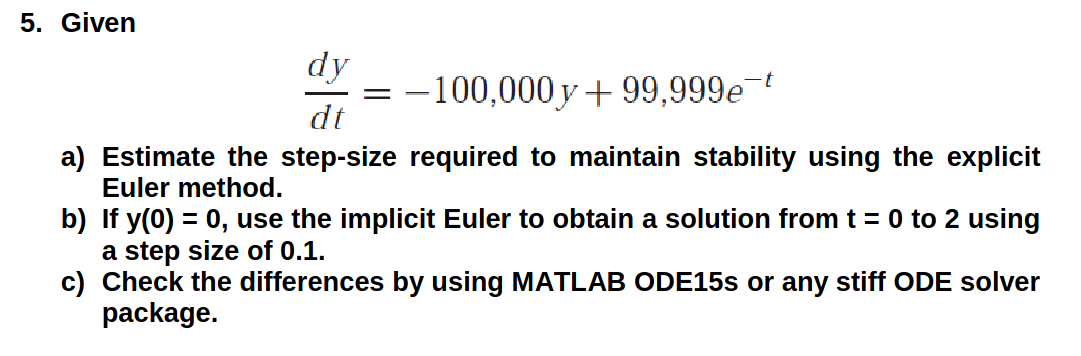

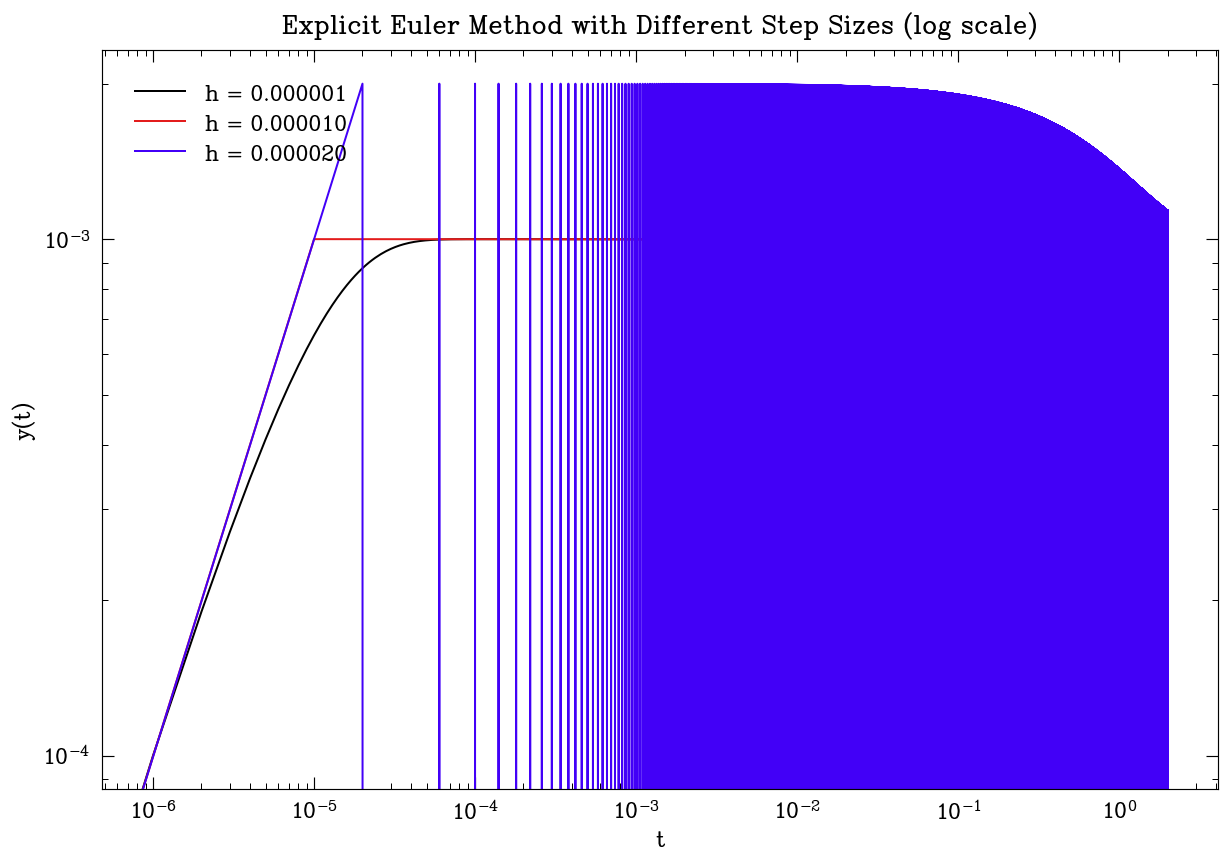

In [ ]:
def dydt(t, y):
    return -100000*y + 99.999*np.exp(-t)

def explicit_euler(t0, y0, t_end, h):
    t = t0
    y = y0
    t_list = [t0]
    y_list = [y0]

    while t < t_end:
        y_new = y + h*dydt(t, y)
        y = y_new
        t += h
        t_list.append(t)
        y_list.append(y)

    return t_list, y_list

step_sizes = [1e-6,1e-5,2e-5]

fig, ax = plt.subplots(figsize=(12, 8))

for h in step_sizes:
    t, y = explicit_euler(0, 0, 2, h)
    ax.plot(t, y, label=f"h = {h:.6f}")


ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("t")
ax.set_ylabel("y(t)")
ax.set_title("Explicit Euler Method with Different Step Sizes (log scale)")
ax.legend()
plt.show()

In [ ]:
dt_max = 0.00001
print(f"Maximum step-size for stability using explicit Euler: {dt_max:.5f}")

Maximum step-size for stability using explicit Euler: 0.00001


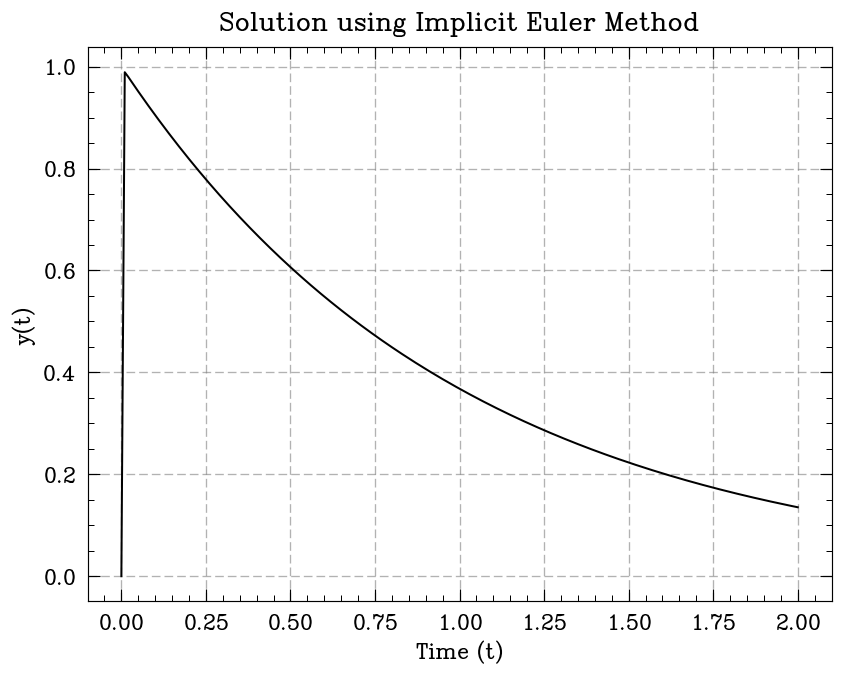

In [ ]:
# Given differential equation
dy_dt = lambda y, t: -100000 * y + 99999 * np.exp(-t)

# b) Solving using implicit Euler method with step-size 0.1
t0 = 0
t_end = 2
dt = 0.01
t = np.arange(t0, t_end + dt, dt)
y = np.zeros_like(t)
y[0] = 0  # Initial condition

for i in range(len(t)-1):
    y[i+1] = (y[i] + 99999 * dt * np.exp(-(t[i+1]))) / (1 + 100000 * dt)

# Plot the solution
plt.figure(figsize=(8, 6))
plt.plot(t, y)
plt.xlabel('Time (t)')
plt.ylabel('y(t)')
plt.title('Solution using Implicit Euler Method')
plt.grid()
plt.show()

In [ ]:
from scipy.integrate import solve_ivp

def dv_dt(t, v):
    return -100000 * v + 99999 * np.exp(-t)

t_span = (0, 2)
v0 = 0
t_eval = np.arange(t_span[0], t_span[1] + 0.1, 0.1)

sol = solve_ivp(dv_dt, t_span, [v0], method='BDF', t_eval=t_eval)

print("Solution using the stiff ODE solver")
print(sol.t)
print(sol.y[0])

Solution using the stiff ODE solver
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[0.         0.90483666 0.81873084 0.74090243 0.67045887 0.60653891
 0.54896049 0.49680029 0.44933838 0.40656725 0.36788345 0.33290494
 0.30123091 0.27254826 0.24662641 0.2231289  0.20189216 0.18268278
 0.16529214 0.14956285 0.13533529]


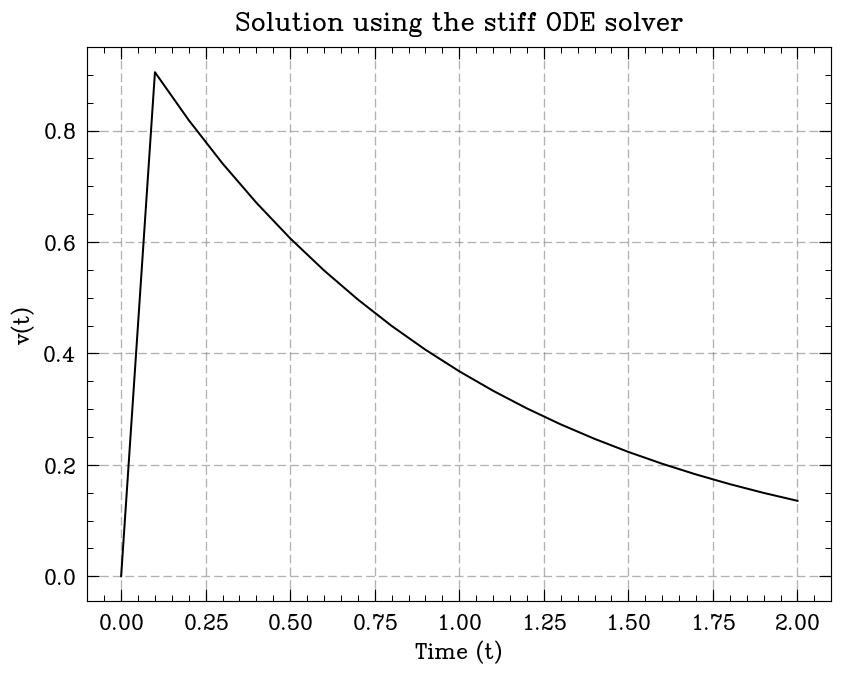

In [ ]:
from scipy.integrate import solve_ivp

def dv_dt(t, v):
    return -100000 * v + 99999 * np.exp(-t)

t_span = (0, 2)
v0 = 0
t_eval = np.arange(t_span[0], t_span[1] + 0.1, 0.1)

sol = solve_ivp(dv_dt, t_span, [v0], method='BDF', t_eval=t_eval)

plt.figure(figsize=(8, 6))
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time (t)')
plt.ylabel('v(t)')
plt.title('Solution using the stiff ODE solver')
plt.grid(True)
plt.show()